# Random Forest


In [1]:
# %% Import libs
import numpy as np
import pandas as pd
import BiosignalsMetadata as bsm
from matplotlib import pyplot as plt
import seaborn as sns

from sklearn.metrics import accuracy_score
from sklearn.metrics import log_loss
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
import time

## Load training data

In [6]:
# %% Load data
train_df = pd.read_csv("train_data_features_clean.csv")
# %% extract train set features and labels
X_train = train_df.iloc[:,7:]
y_train = train_df["Activity"]

## Fit Random Forest model with grid searching

In [11]:
# Hyper parameters
max_depths = [5,10,20,30,40,50,60,70,80]
n_trees = [10,50,100,200,300,400,500,600,700,800]

In [12]:
ti = time.time()

grid_cv = GridSearchCV(RandomForestClassifier(), # first put the model object here
                          param_grid = {'max_depth':max_depths, # place the grid values for max_depth and
                                        'n_estimators':n_trees}, # and n_estimators here
                          scoring = 'neg_log_loss', # put the metric we are trying to optimize here as a string
                          cv = 5,
                          n_jobs=-1) 

grid_cv.fit(X_train, y_train)

tf= time.time()
print("the total time of gridsearchcv is: ", tf-ti)

the total time of gridsearchcv is:  461.31285214424133


### How the model work on test dataset

In [24]:
# Load test dataset
test_df = pd.read_csv("test_data_features_clean.csv")
X_test = test_df.iloc[:,7:]
y_test = test_df["Activity"]

In [25]:
grid_cv.best_params_

{'max_depth': 70, 'n_estimators': 500}

In [26]:
emg_clf = grid_cv.best_estimator_
y_pred=emg_clf.predict(X_test)
y_pred_proba = emg_clf.predict_proba(X_test)
print(accuracy_score(y_test.values.ravel(), y_pred))

0.9768339768339769


In [27]:
log_loss(y_test.values, y_pred_proba)

0.13987535881829133

array(['baseline', 'gesticulate', 'greetings', 'jumps', 'lift', 'run',
       'walk_after', 'walk_before'], dtype=object)

## Plot the comfusion matrix

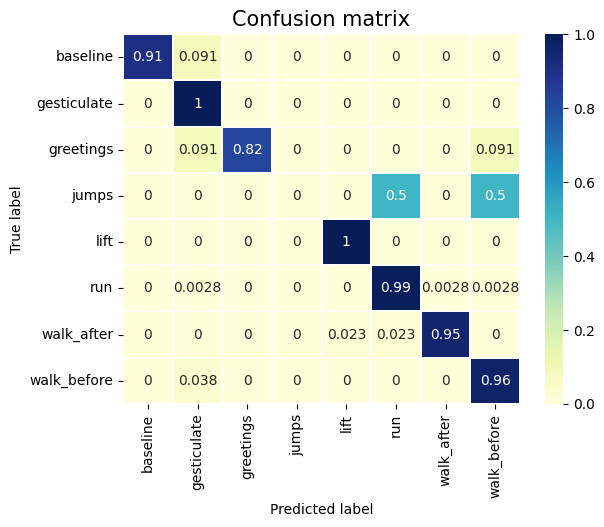

In [38]:
# %% Confusion matrix
import seaborn as sns
confusionmatrix = confusion_matrix(y_test, y_pred, normalize = 'true')

sns.heatmap(confusionmatrix, annot=True, xticklabels = emg_clf.classes_, yticklabels=emg_clf.classes_, linewidths = 0.1, cmap = 'YlGnBu')
plt.title("Confusion matrix", fontsize = 15)
plt.ylabel("True label")
plt.xlabel("Predicted label")
plt.show()

## Explore feature importance

In [40]:
importance_df = pd.DataFrame({'feature':X_train.columns,
                                'importance_score':grid_cv.best_estimator_.feature_importances_})

importance_df= importance_df.sort_values('importance_score',ascending=False)


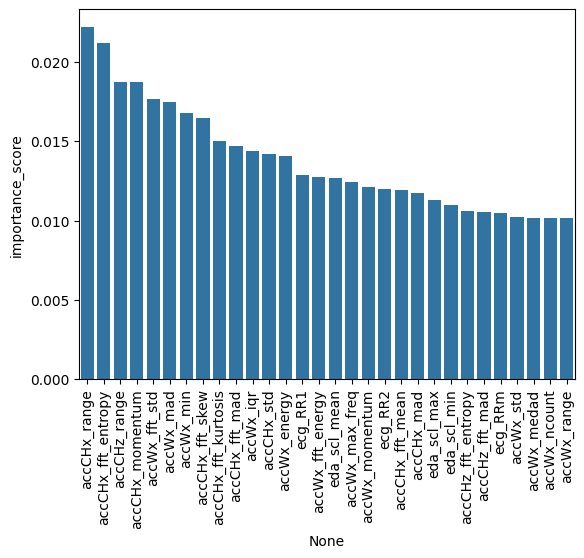

In [41]:
top_importance = importance_df.loc[importance_df['importance_score']>=0.01]
b = sns.barplot(top_importance, x = X_test.columns[top_importance.index], y = top_importance['importance_score'])
b.tick_params(axis='x',rotation=90)